### Imports

In [2]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

## Useful expressions and functions

In [3]:
DATA_FOLDER = '../data_clean'
# Precomputed regular expression to check if a column is corresponding to a date
IS_DATE = re.compile("^[1-2]{1}[0-9]{3}$")

In [4]:
def describeDf(df,name="DESCRIPTION",level=1):
    """
    Describe the data. Different levels are possible.
    Level 0: Name the different columns
    Level 1: Explore the values of each column
    """
    # Print a header
    print("______________________________ " + name+" ______________________________\n")
    
    date = []
    
    # For level 1
    if(level==1):
        print("\n")
        # Go through the columns
        for col in df.columns:
            # Explore and print the unique values of columns not corresponding to a date
            if((not IS_DATE.match(col)) & (not re.compile("[0-9]+ an").match(col))):
                # Header
                print("         ATTRIBUTE: "+col)
                # Values in the columns
                print("   "+str(df[col].unique()))
                print("\n")
            else:
                date.append(col)
        # Print the dates columns
        print("         VALUES: "+str(date))
        print("\n\n\n")
    # For level 0
    elif(level==0) :
        print(df.columns.values)
        print("\n\n\n")
    # Raise an error if the level value doesn't exist
    else:
        raise NotImplementedError

## Cantons dictionary

In [5]:
dict_cantons = dict()
dict_cantons['AA'] = ['Appenzell Rh.-Ext.','Appenzell Ausserrhoden']
dict_cantons['AG'] = ['Argovie','Aargau']
dict_cantons['AI'] = ['Appenzell Rh.-Int.','Appenzell Innerrhoden']
dict_cantons['BE'] = ['Berne', 'Bern', 'Bern / Berne']
dict_cantons['BL'] = ['Bâle-Campagne','Basel-Landschaft']
dict_cantons['BS'] = ['Bâle-Ville','Basel-Stadt']
dict_cantons['FR'] = ['Fribourg', 'Fribourg / Freiburg']
dict_cantons['GE'] = ['Genève', 'Genf']
dict_cantons['GL'] = ['Glaris', 'Glarus']
dict_cantons['GR'] = ['Grisons', 'Graubünden', 'Grigioni', 'Grischun', 'Graubünden / Grigioni / Grischun']
dict_cantons['JU'] = ['Jura']
dict_cantons['LU'] = ['Lucerne', 'Luzern']
dict_cantons['NE'] = ['Neuchâtel']
dict_cantons['NW'] = ['Nidwald', 'Nidwalden']
dict_cantons['OW'] = ['Obwald', 'Obwalden']
dict_cantons['SG'] = ['St. Gall', 'St. Gallen', 'Saint-Gall']
dict_cantons['SH'] = ['Schaffhouse', 'Schaffhausen']
dict_cantons['SO'] = ['Soleure', 'Solothurn']
dict_cantons['SZ'] = ['Schwytz', 'Schwyz']
dict_cantons['TE'] = ['Tessin', 'Ticino']
dict_cantons['TG'] = ['Thurgovie', 'Thurgau']
dict_cantons['UR'] = ['Uri']
dict_cantons['VS'] = ['Valais', 'Wallis', 'Valais / Wallis']
dict_cantons['VD'] = ['Vaud']
dict_cantons['ZG'] = ['Zoug', 'Zug']
dict_cantons['ZH'] = ['Zurich', 'Zürich']

In [6]:
def getKeysByValue(dictOfElements, valueToFind):
    '''
    find the key of a canton
    '''
    for item  in dictOfElements.items():
        if valueToFind in item[1]:
            return item[0]
            break
    raise NotImplementedError

## Load and describe the data

In [7]:
print("Dataframes available:\n\n")
for file in os.listdir(DATA_FOLDER):
    filename = os.fsdecode(file)
    tablename = "df_"+os.path.splitext(os.path.splitext(filename)[0])[0]
    globals()[tablename] = pd.read_csv(DATA_FOLDER + '/' + filename)
    try:
        globals()[tablename] = globals()[tablename].drop(columns=['Unnamed: 0'])
    except:
        pass
    describeDf(globals()[tablename], name=tablename,level=0)
    

Dataframes available:


______________________________ df_Accident_cantons ______________________________

['canton_index' 'canton' 'gravite_index' 'gravite' 'ruralite_index'
 'ruralite' '1992' '1993' '1994' '1995' '1996' '1997' '1998' '1999' '2000'
 '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009' '2010'
 '2011' '2012' '2013' '2014' '2015' '2016' '2017']




______________________________ df_Accident_circonstances ______________________________

['mois_index' 'mois' 'day_index' 'day' 'hours_index' 'hours'
 'gravite_index' 'gravite' 'ruralite_index' 'ruralite' 'contexte_index'
 'contexte' 'circonstance_index' 'circonstance' '1992' '1993' '1994'
 '1995' '1996' '1997' '1998' '1999' '2000' '2001' '2002' '2003' '2004'
 '2005' '2006' '2007' '2008' '2009' '2010' '2011' '2012' '2013' '2014'
 '2015' '2016' '2017']




______________________________ df_Accident_objets ______________________________

['voiture_index' 'voiture' 'age_index' 'age' 'sexe_index' 'sexe'
 'annee_permis_in

## Study of correlations with household spendings

In [19]:
# RUN ONLY ONCE
df_Depense_menages_canton['Canton'] = df_Depense_menages_canton['Canton'].apply(lambda x: getKeysByValue(dict_cantons, x))
spend_fuel = df_Depense_menages_canton[df_Depense_menages_canton['Mode'] == 'Tot']\
                                    [['annee', 'Canton','Carburants et lubrifiants']]
spend_alcool = df_Depense_menages_canton[df_Depense_menages_canton['Mode'] == 'Tot']\
                                    [['annee', 'Canton','Eaux-de-vie']]
spend_biere = df_Depense_menages_canton[df_Depense_menages_canton['Mode'] == 'Tot']\
                                    [['annee', 'Canton','Bières']]
df_Accident_cantons['canton'] = df_Accident_cantons['canton'].apply(lambda x: getKeysByValue(dict_cantons, x))

In [91]:
df_Accident_cantons = df_Accident_cantons.dropna(axis=0)
df_Accident_cantons['2006–2008'] = df_Accident_cantons.apply(lambda df: df['2006'] + df['2007'] + df['2008'], axis=1)
df_Accident_cantons['2009–2011'] = df_Accident_cantons.apply(lambda df: df['2009'] + df['2010'] + df['2011'], axis=1)
df_Accident_cantons['2012–2014'] = df_Accident_cantons.apply(lambda df: df['2012'] + df['2013'] + df['2014'], axis=1)

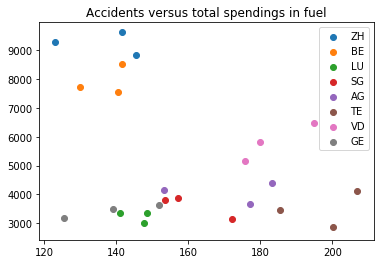

In [165]:
df_accident_canton = df_Accident_cantons.groupby(['canton']).sum()[['2006–2008', '2009–2011', '2012–2014']]
xSpendFuel = []
yAccident = []
for canton in spend_fuel['Canton'].unique():
    xSpendFuel = []
    yAccident = []
    for period in spend_fuel['annee'].unique():
        xSpendFuel.append(float(spend_fuel[(spend_fuel.Canton == canton) & (spend_fuel.annee == period)]['Carburants et lubrifiants']))
        yAccident.append(df_accident_canton[period][canton])
    plt.scatter(xSpendFuel, yAccident)
        
plt.legend(spend_fuel['Canton'].unique())
plt.title('Accidents versus total spendings in fuel')
plt.show()

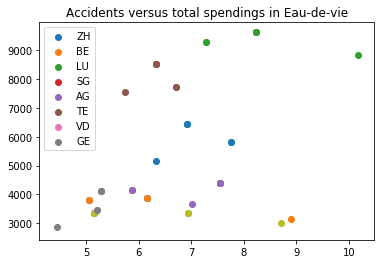

In [164]:
xSpendFuel = []
yAccident = []
for canton in spend_alcool['Canton'].unique():
    xSpendFuel = []
    yAccident = []
    for period in spend_alcool['annee'].unique():
        spndEDV = str(spend_alcool[(spend_alcool.Canton == canton) & (spend_alcool.annee == period)]['Eaux-de-vie'].values)[2:-2]
        if not (re.match( r'\( \)', spndEDV, re.M|re.I)):
            xSpendFuel.append(float(spndEDV))
            yAccident.append(df_accident_canton[period][canton])
        plt.scatter(xSpendFuel, yAccident)
            
plt.legend(spend_alcool['Canton'].unique())
plt.title('Accidents versus total spendings in Eau-de-vie')
plt.show()

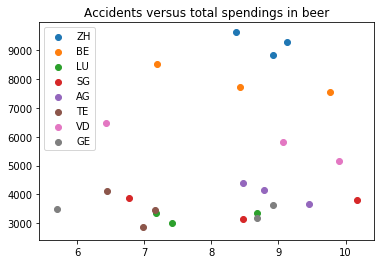

In [231]:
xSpendFuel = []
yAccident = []
for canton in spend_biere['Canton'].unique():
    xSpendFuel = []
    yAccident = []
    for period in spend_biere['annee'].unique():
        xSpendFuel.append(float(spend_biere[(spend_biere.Canton == canton) & (spend_biere.annee == period)]['Bières']))
        yAccident.append(df_accident_canton[period][canton])
    plt.scatter(xSpendFuel, yAccident)
        
plt.legend(spend_biere['Canton'].unique())
plt.title('Accidents versus total spendings in beer')
plt.show()

## Correlations between vehicles and accidents (in cantons)

In [11]:
# RUN ONLY ONCE
df_conf = df_Voitures[df_Voitures.canton == 'Confédération'] 
df_Voitures = df_Voitures.drop(df_conf.index, axis=0)
df_Voitures['canton'] = df_Voitures['canton'].apply(lambda x: getKeysByValue(dict_cantons, x))

In [12]:
df_cyl = df_Voitures[df_Voitures.cylindre_index == -1] 
df_Voitures = df_Voitures.drop(df_cyl.index, axis=0)

def cylScore(vect):
    scoreTot = 0.25*vect[1] + 0.5*vect[2] + 0.75*vect[3] + vect[4]
    nTot = sum(vect)
    scoreNormalized = scoreTot/nTot
    return scoreNormalized

df_cyl_canton = df_Voitures.groupby(['canton','cylindre_index']).sum()
df_cyl_no_index = df_cyl_canton.reset_index()
vect_cyl = df_cyl_no_index[df_cyl_no_index.canton=='AG']['1992'].values
cylScore(vect_cyl) 

0.40212011289187977

In [22]:
df_Accident_cantons

,canton_index,canton,gravite_index,gravite,ruralite_index,ruralite,1992,1993,1994,1995,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.0,ZH,315.0,Accidents avec blessés légers,10.0,En localité,1323.0,1514.0,1752.0,1629.0,...,2035.0,2020.0,1915.0,1874.0,1789.0,1696.0,1877.0,2039.0,2247.0,2161.0
1,1.0,ZH,315.0,Accidents avec blessés légers,11.0,Hors localité,388.0,341.0,366.0,360.0,...,354.0,395.0,358.0,315.0,321.0,314.0,340.0,353.0,352.0,419.0
2,1.0,ZH,315.0,Accidents avec blessés légers,12.0,Sur autoroute,114.0,109.0,129.0,143.0,...,153.0,218.0,220.0,203.0,216.0,207.0,232.0,210.0,251.0,208.0
3,1.0,ZH,316.0,Accidents avec blessés graves,10.0,En localité,933.0,674.0,603.0,639.0,...,368.0,399.0,346.0,422.0,426.0,441.0,409.0,427.0,403.0,424.0
4,1.0,ZH,316.0,Accidents avec blessés graves,11.0,Hors localité,200.0,180.0,159.0,173.0,...,113.0,113.0,106.0,106.0,116.0,103.0,129.0,120.0,101.0,93.0
5,1.0,ZH,316.0,Accidents avec blessés graves,12.0,Sur autoroute,54.0,48.0,42.0,65.0,...,46.0,45.0,52.0,57.0,35.0,41.0,29.0,30.0,34.0,25.0
6,1.0,ZH,317.0,Accidents mortels,10.0,En localité,46.0,42.0,48.0,34.0,...,20.0,19.0,23.0,22.0,19.0,18.0,10.0,11.0,15.0,12.0
7,1.0,ZH,317.0,Accidents mortels,11.0,Hors localité,35.0,43.0,31.0,33.0,...,21.0,13.0,14.0,11.0,13.0,13.0,16.0,11.0,7.0,6.0
8,1.0,ZH,317.0,Accidents mortels,12.0,Sur autoroute,9.0,9.0,5.0,5.0,...,5.0,3.0,0.0,2.0,5.0,2.0,2.0,1.0,0.0,4.0
9,2.0,BE,315.0,Accidents avec blessés légers,10.0,En localité,1480.0,1423.0,1498.0,1399.0,...,1494.0,1355.0,1375.0,1402.0,1415.0,1337.0,1305.0,1370.0,1245.0,1341.0


C:\Users\Clementg20\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


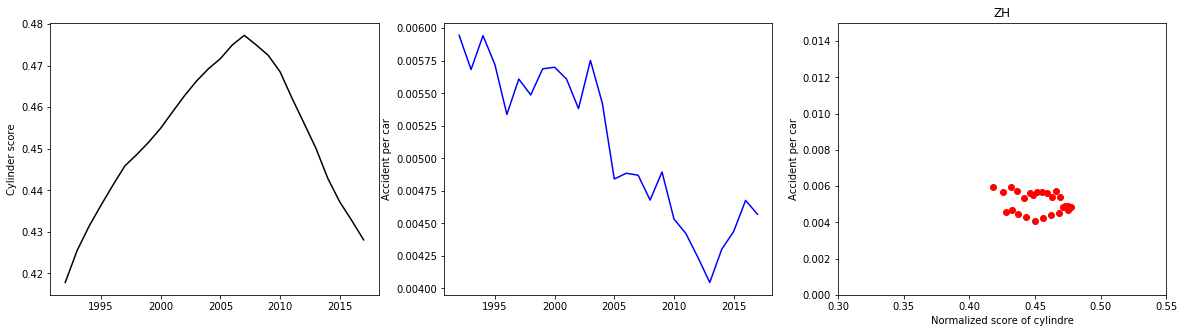

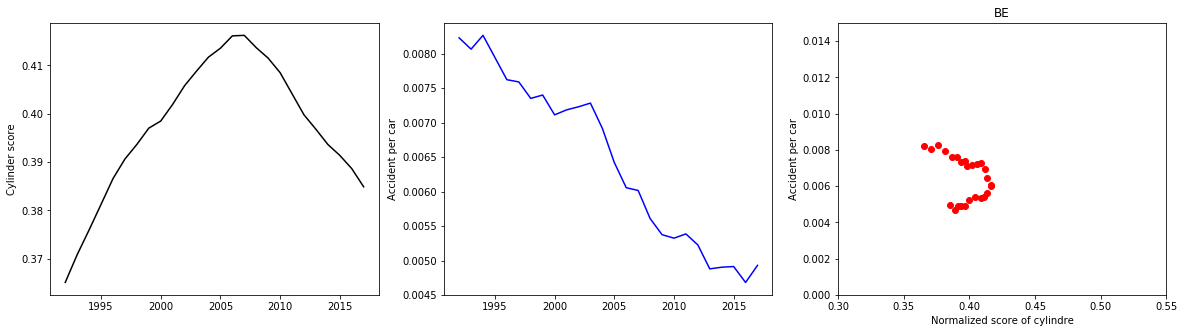

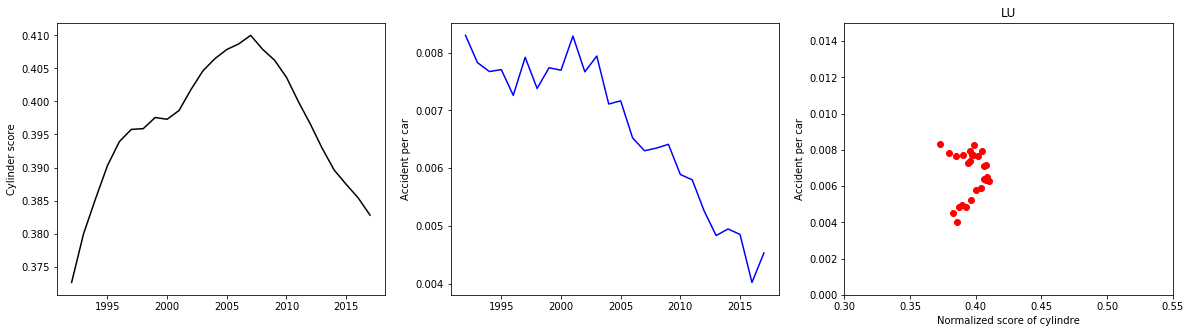

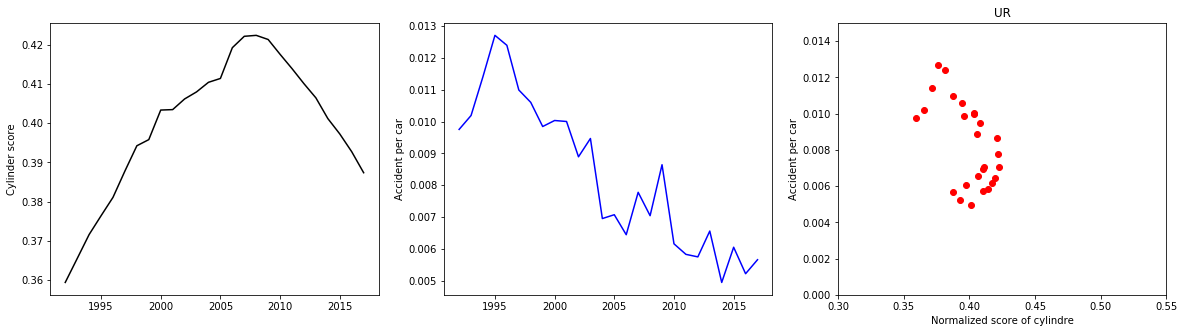

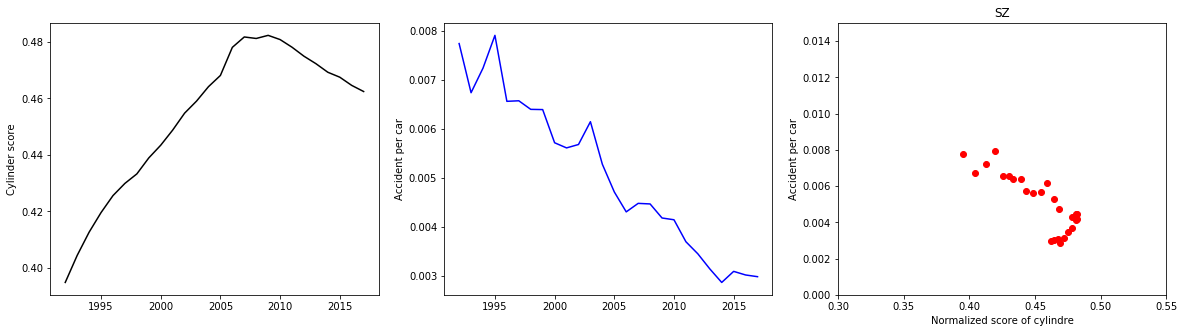

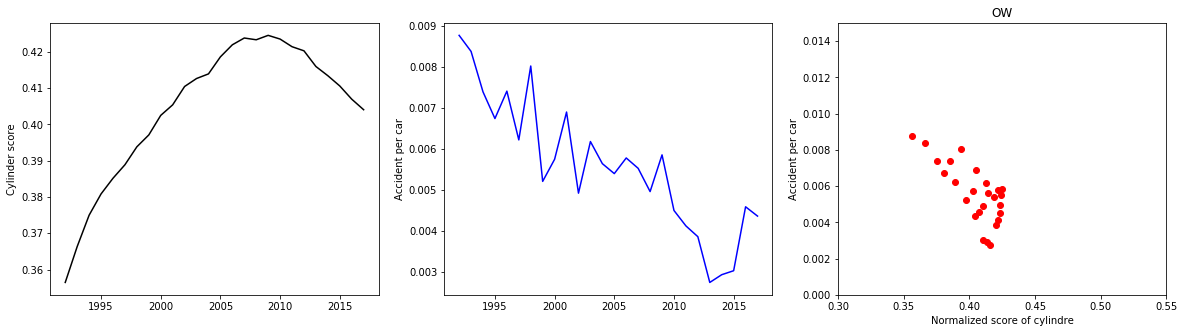

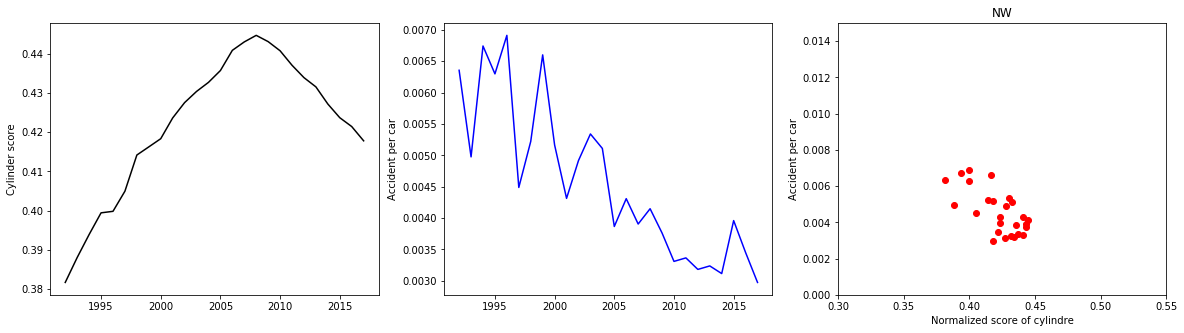

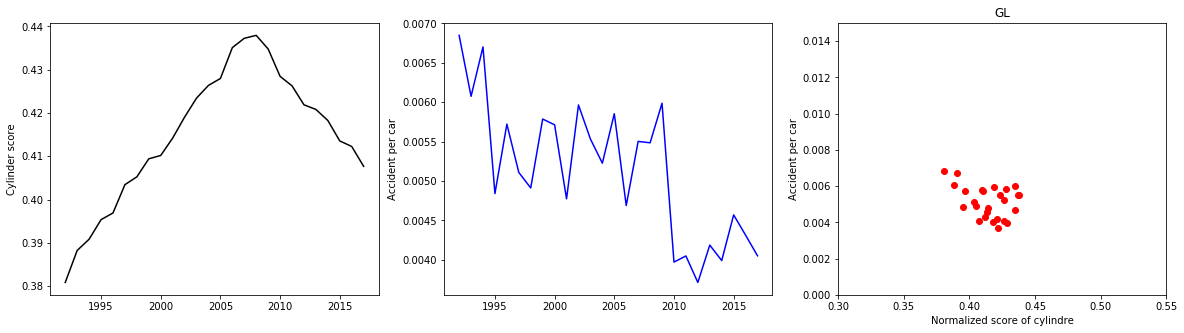

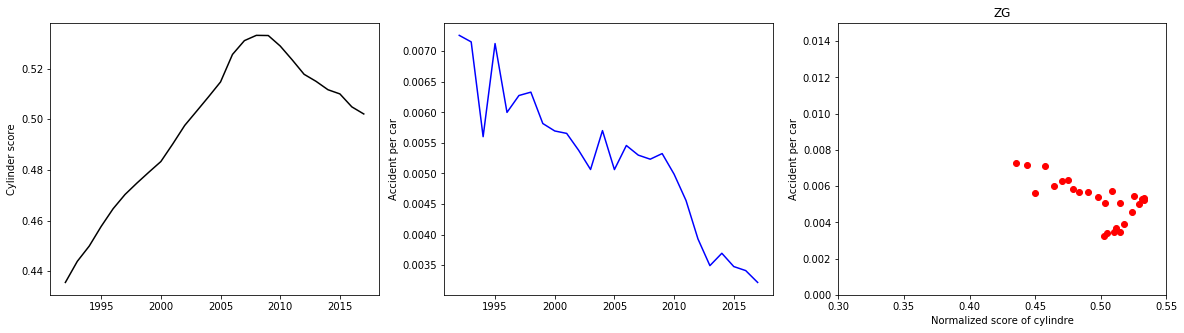

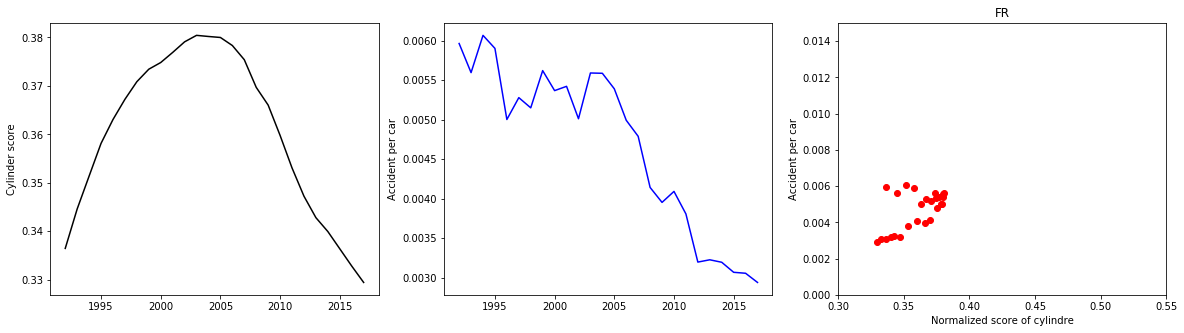

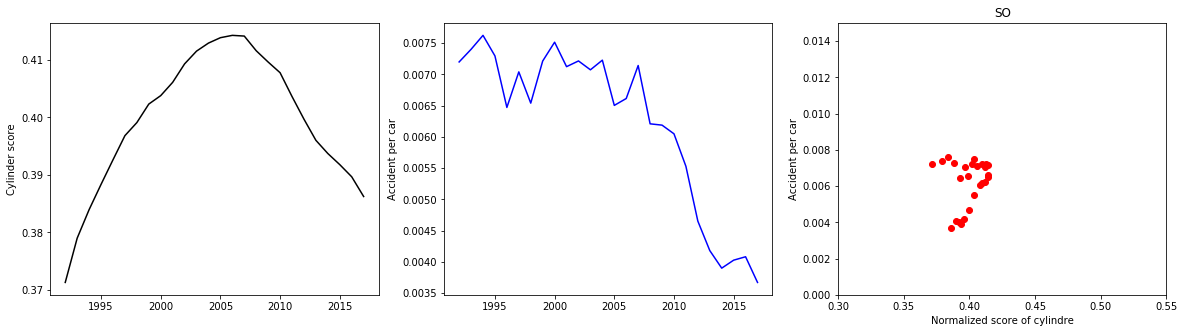

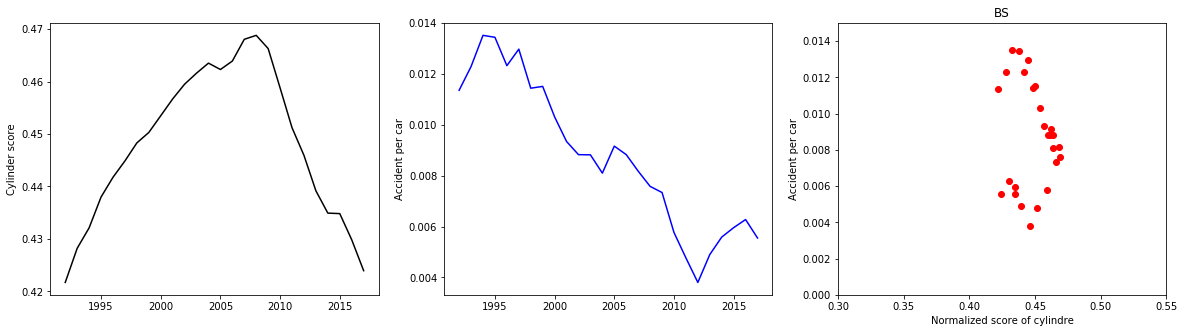

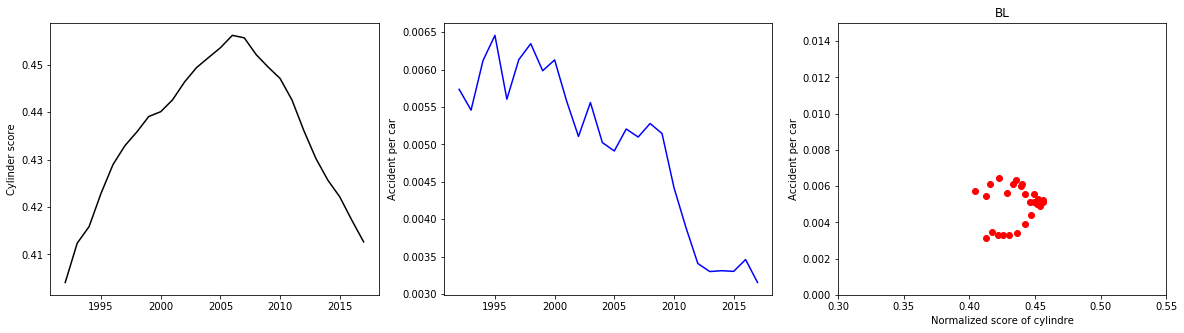

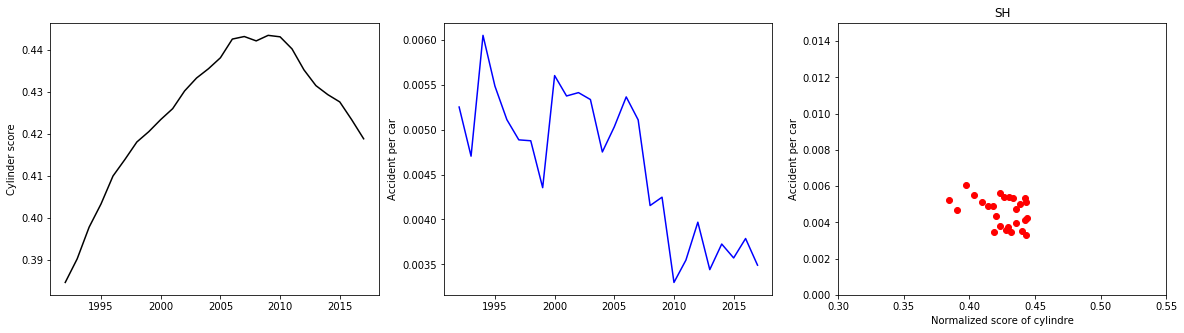

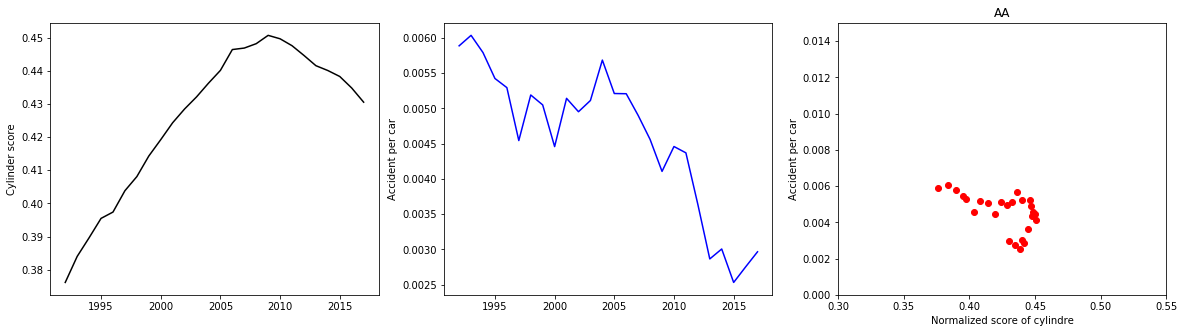

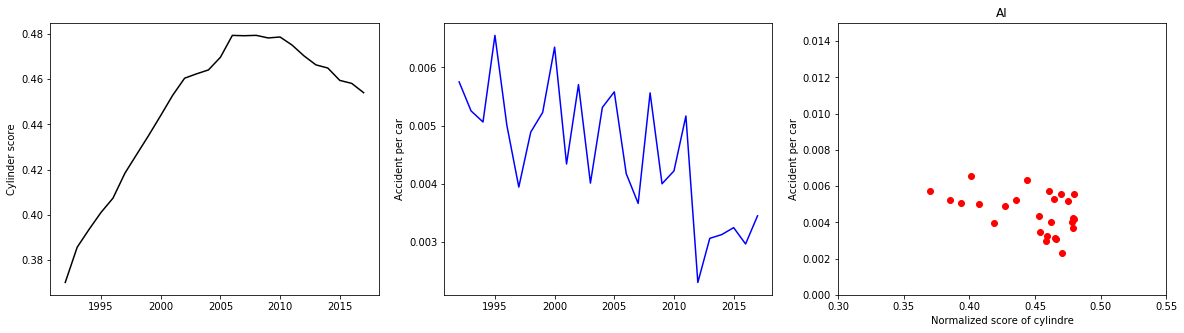

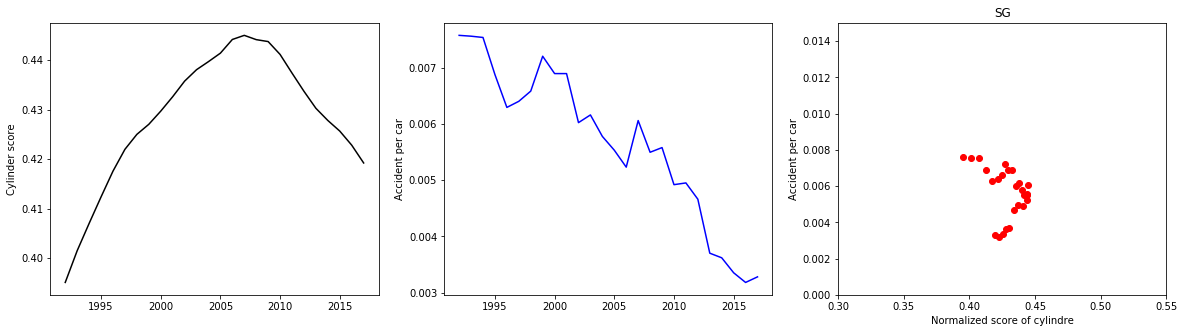

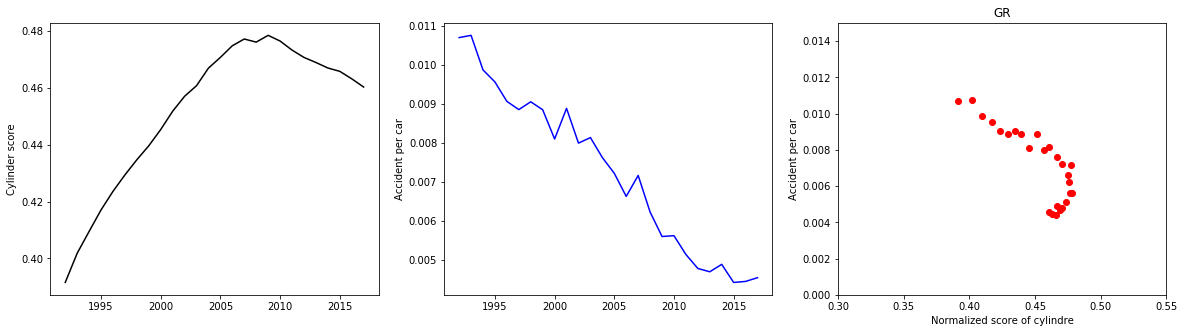

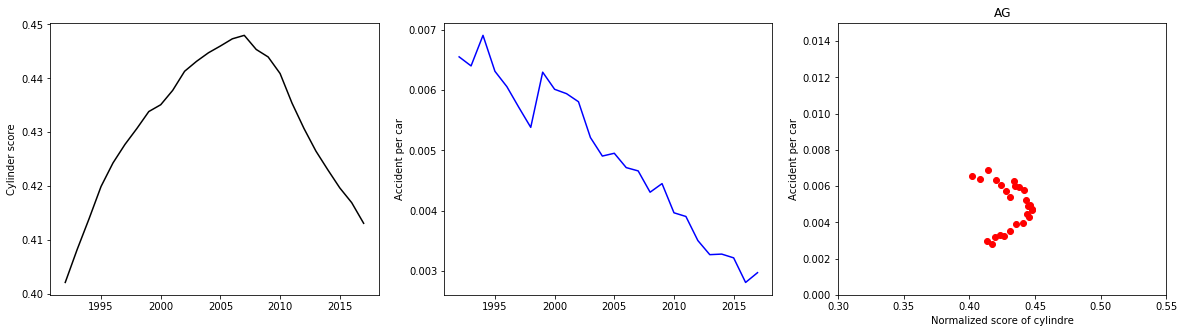

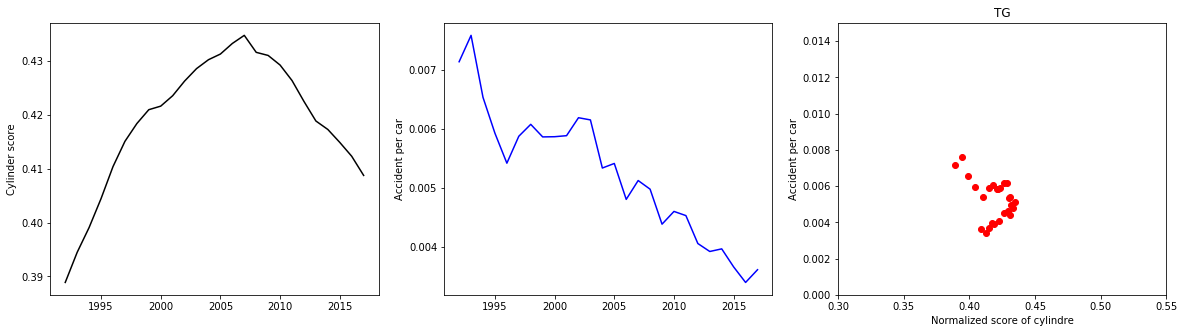

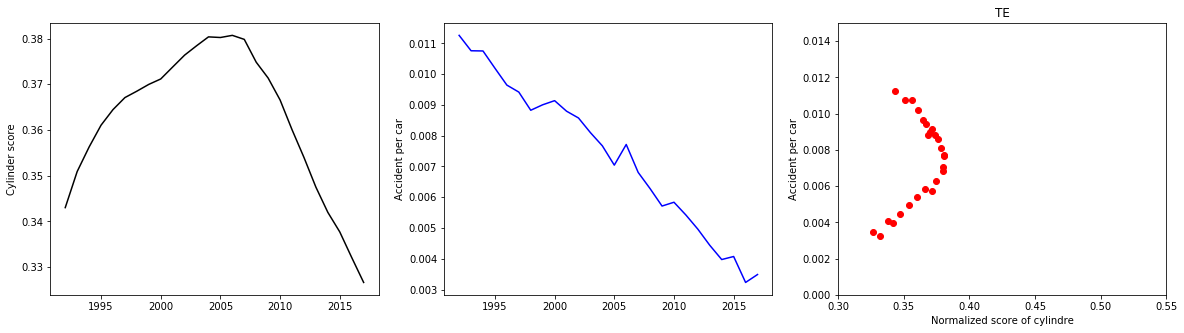

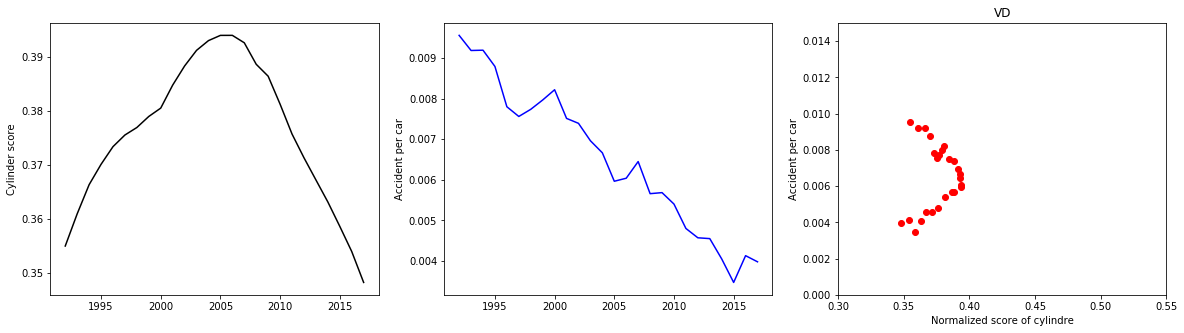

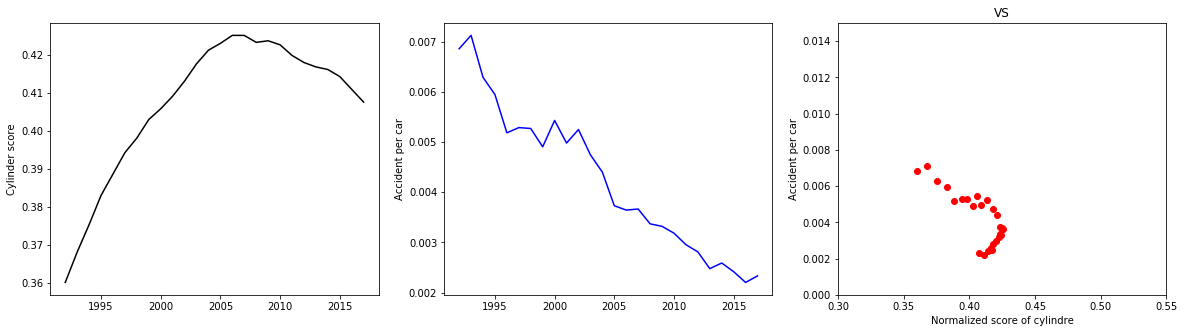

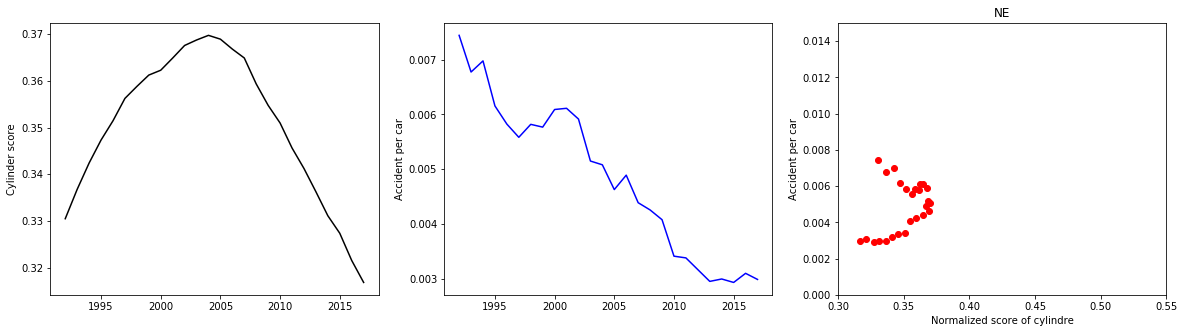

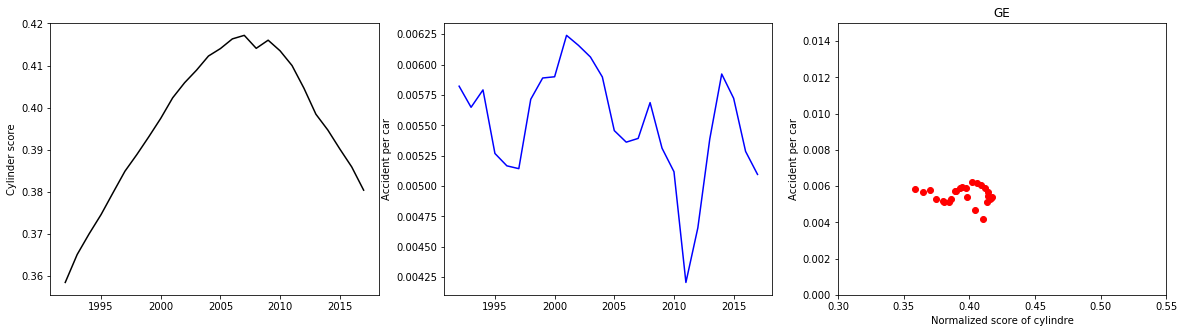

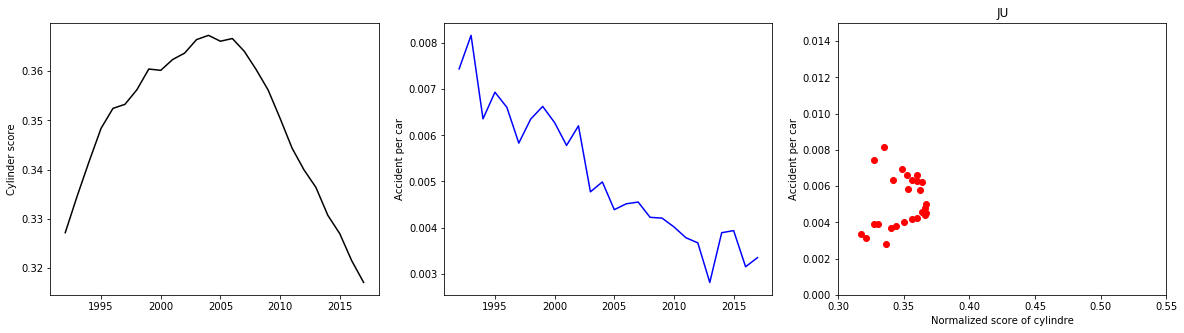

In [31]:
df_accident_cantons = df_Accident_cantons.groupby(['canton']).sum()


for ctn in df_Voitures['canton'].unique():#df_Voitures['canton'].unique():
    ScoreNorm = []
    AccidentNorm = []
    plt.figure(figsize=(20,5))
    for yr in range(1992,2018):
        df_cyl_canton = df_Voitures.groupby(['canton','cylindre_index']).sum()
        df_cyl_no_index = df_cyl_canton.reset_index()
        vect_cyl = df_cyl_no_index[df_cyl_no_index.canton==ctn][str(yr)].values
        nVehicle = sum(vect_cyl)
        ScoreNorm.append(cylScore(vect_cyl))
        AccidentNorm.append((df_accident_cantons[str(yr)][ctn])/nVehicle)
    ax1 = plt.subplot(131)
    ax1.plot(range(1992,2018), ScoreNorm, 'k')
    ax1.set_ylabel('Cylinder score')
    ax2 = plt.subplot(132)
    ax2.plot(range(1992,2018), AccidentNorm, 'b')
    ax2.set_ylabel('Accident per car')
    ax3 = plt.subplot(133)
    ax3.scatter(ScoreNorm, AccidentNorm, color='r')
    ax3.axis([0.3, 0.55, 0, 0.015])
    ax3.set_xlabel('Normalized score of cylindre')
    ax3.set_ylabel('Accident per car')
    plt.title(ctn)
    plt.show

We remark a curve in 2 times: first, the cylinder has increased with decreasing accidents, then accidents have kept decreasing, but average cylinders too.

C:\Users\Clementg20\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


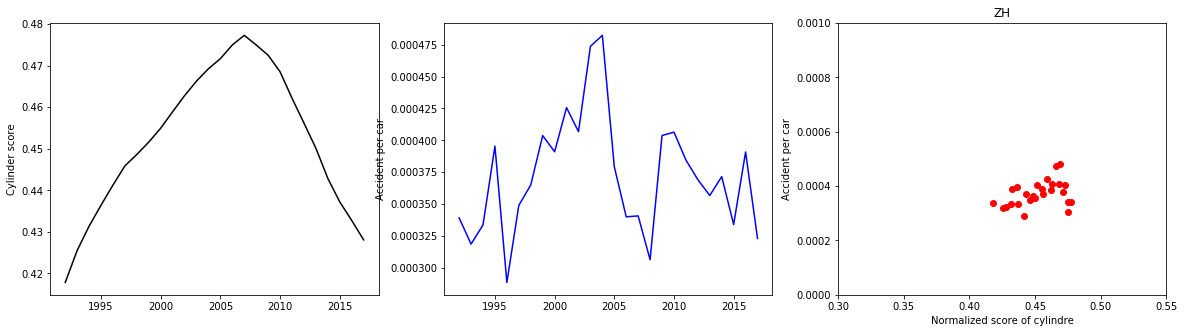

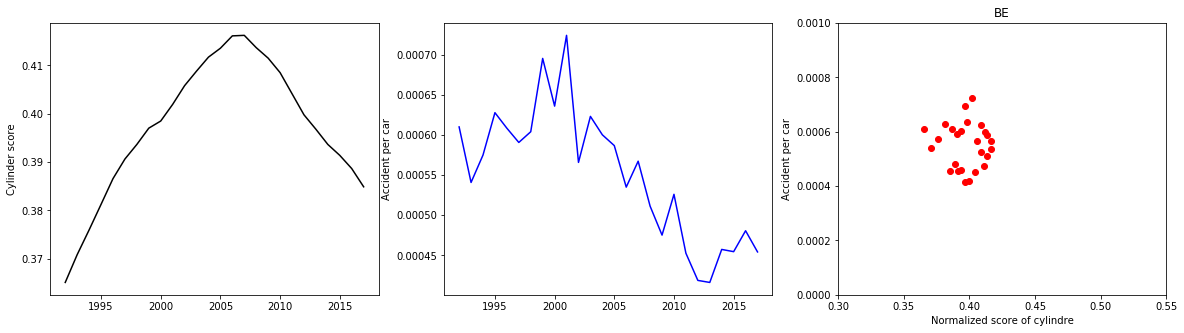

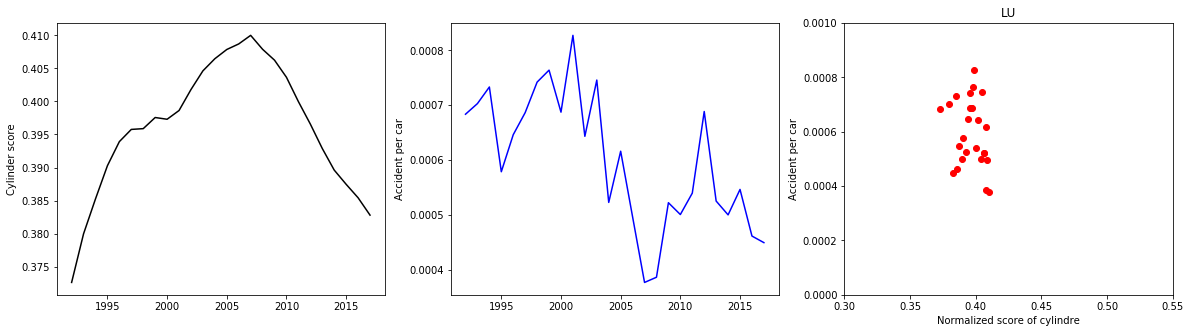

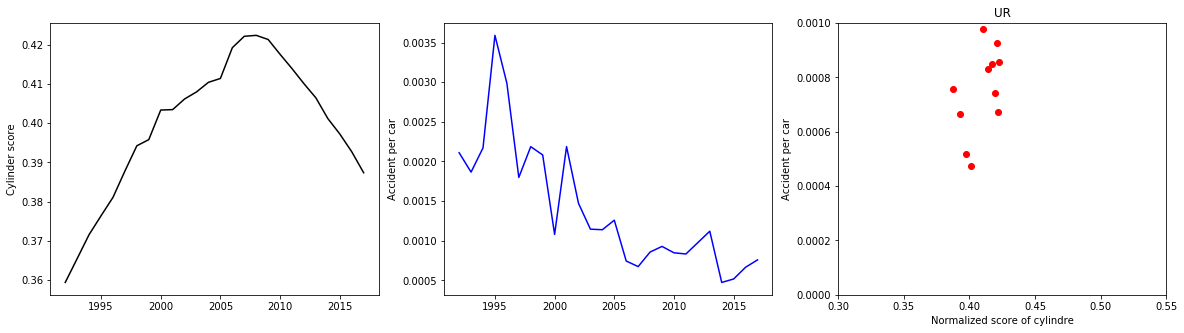

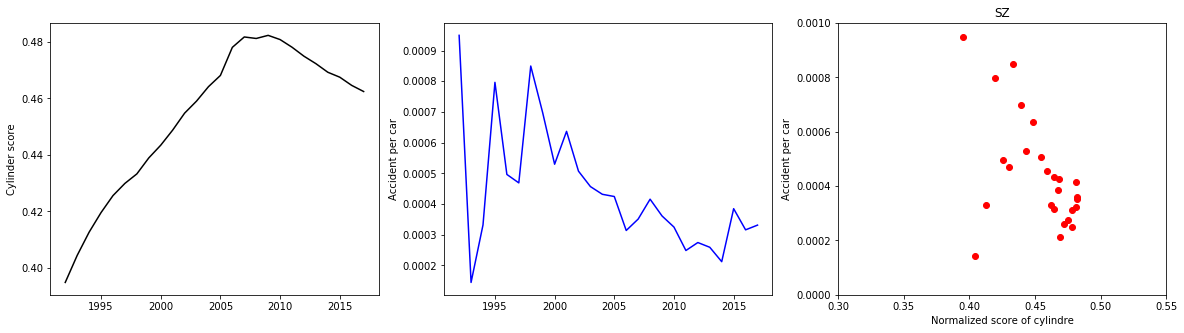

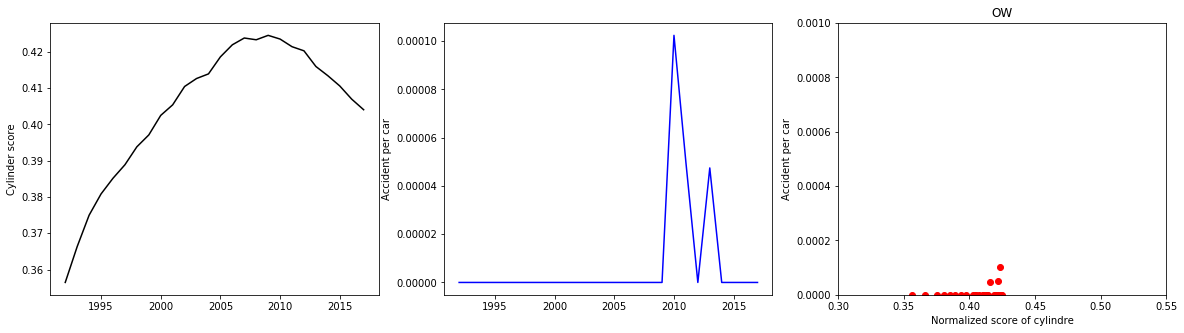

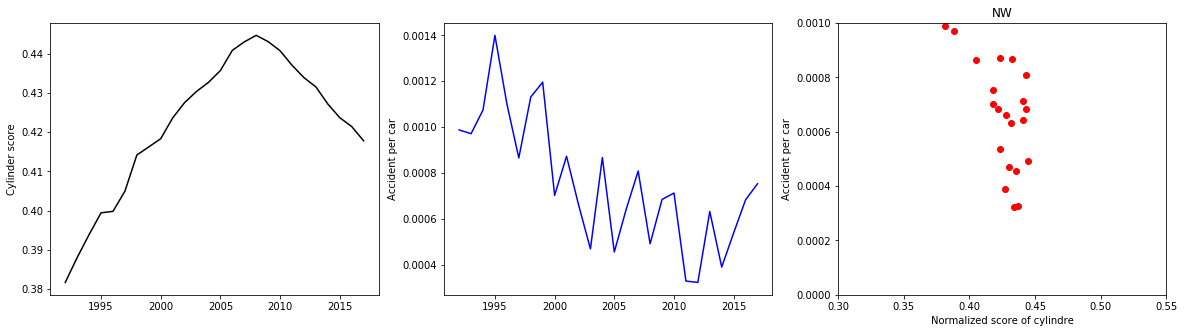

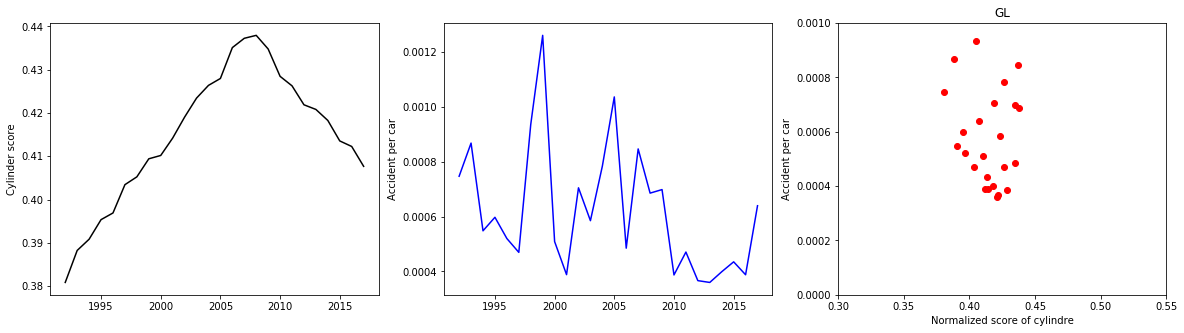

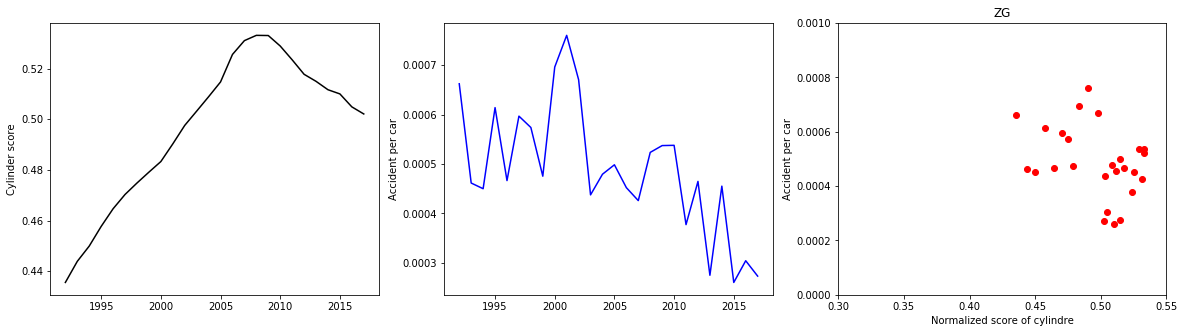

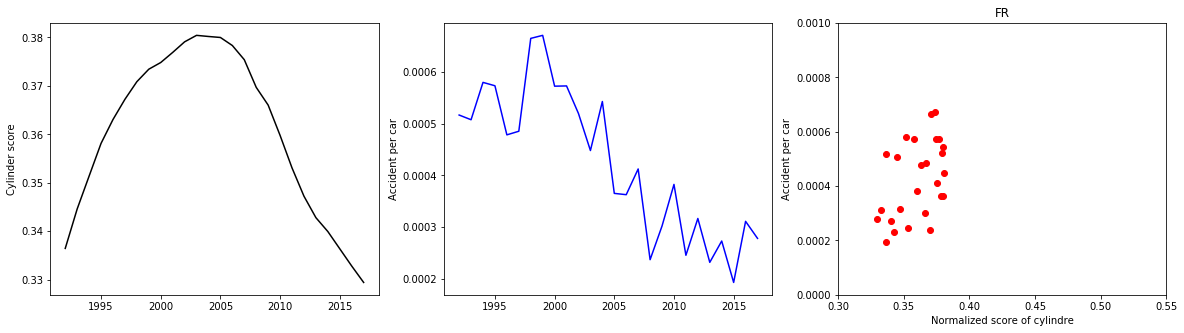

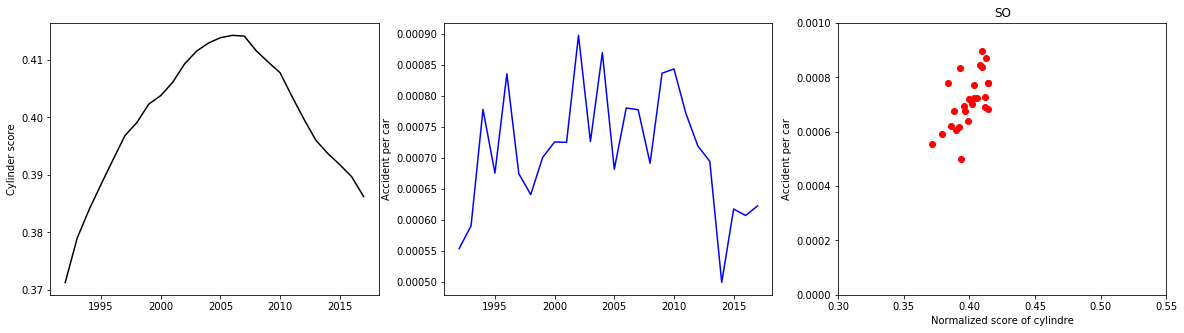

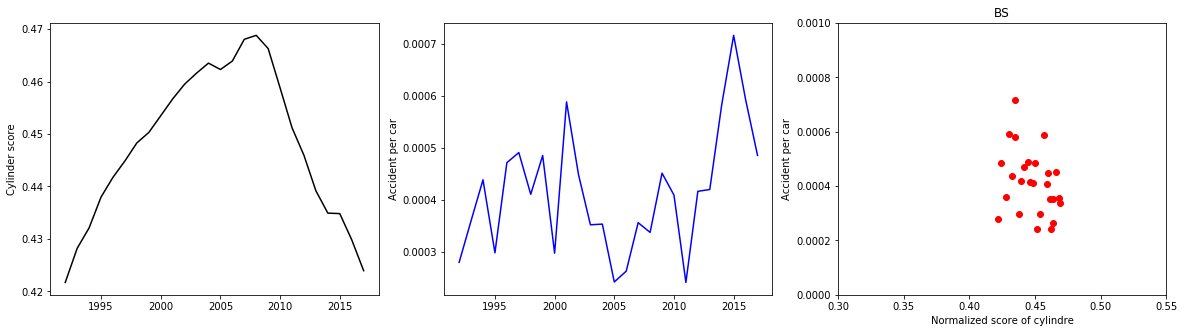

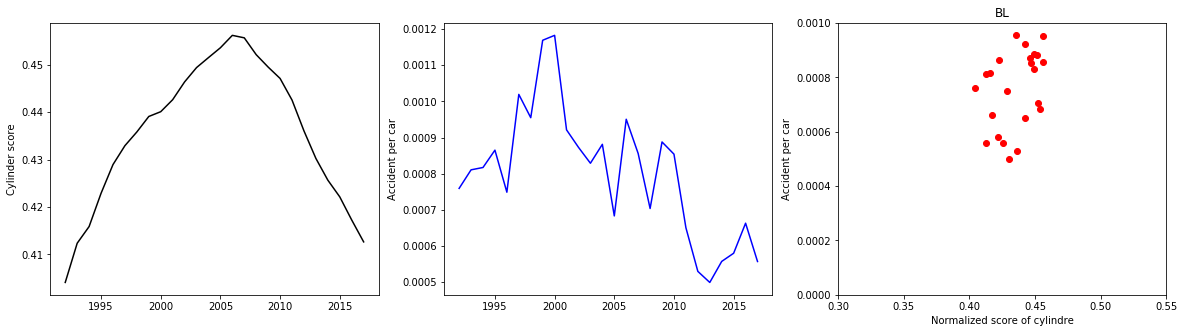

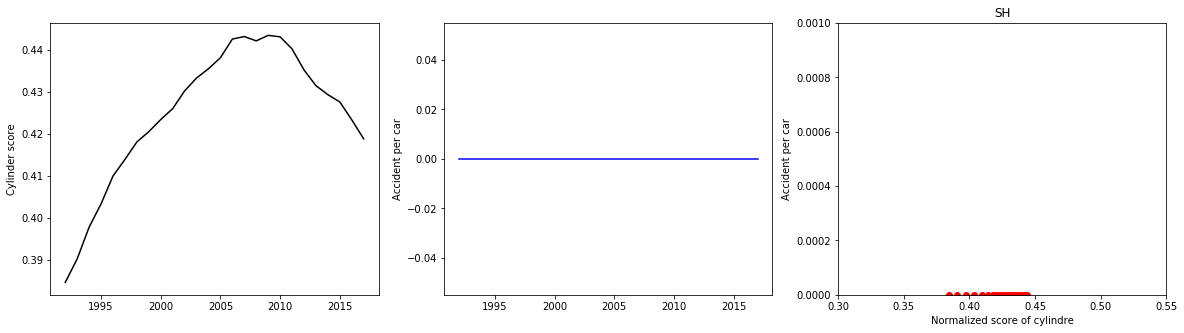

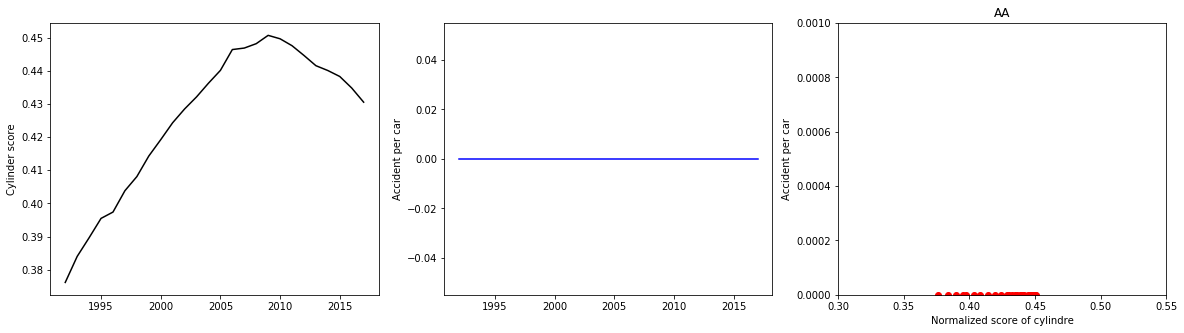

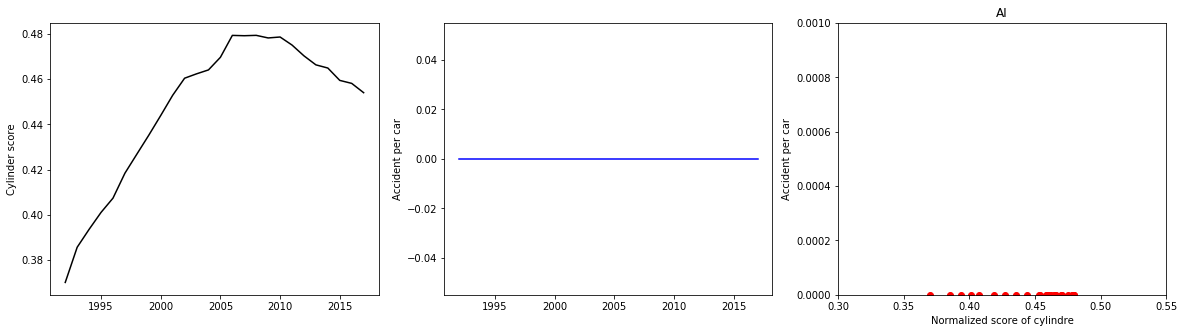

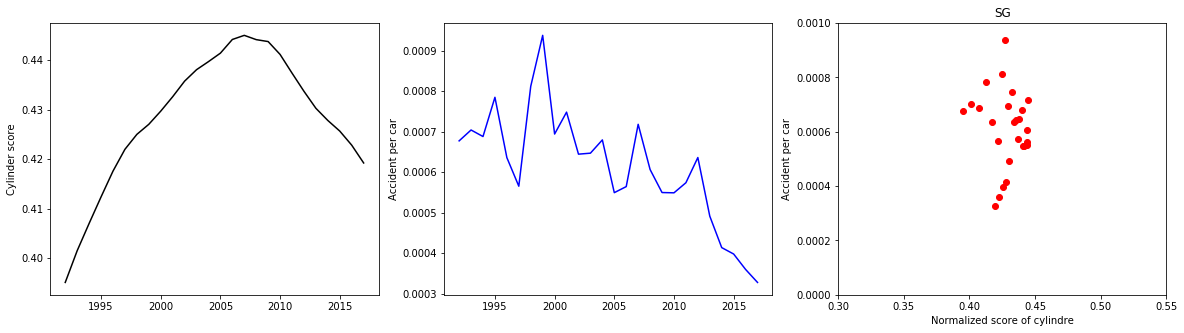

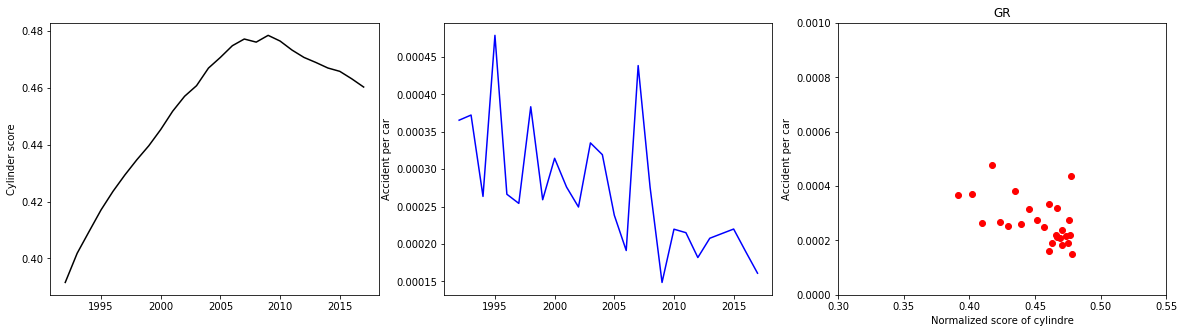

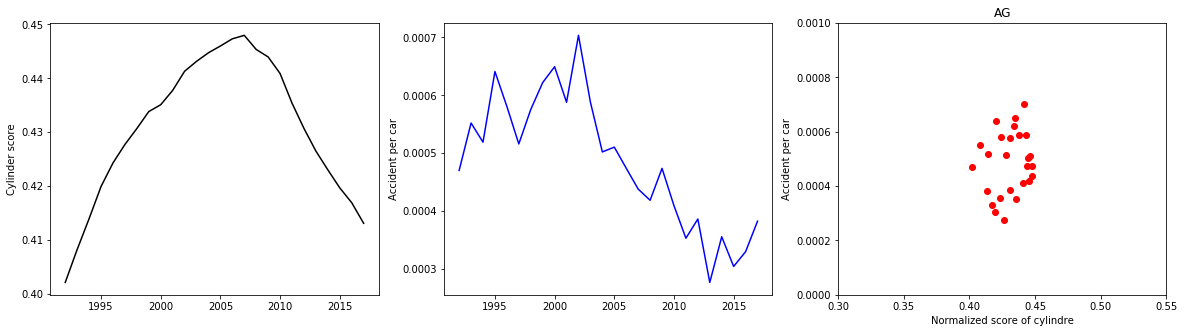

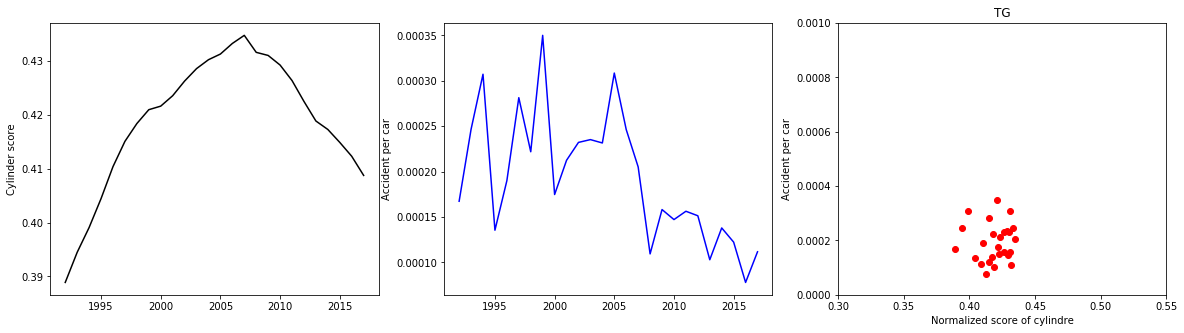

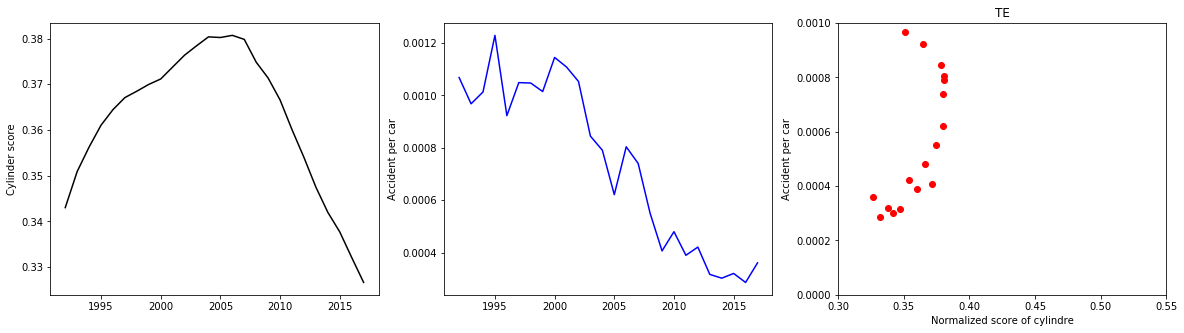

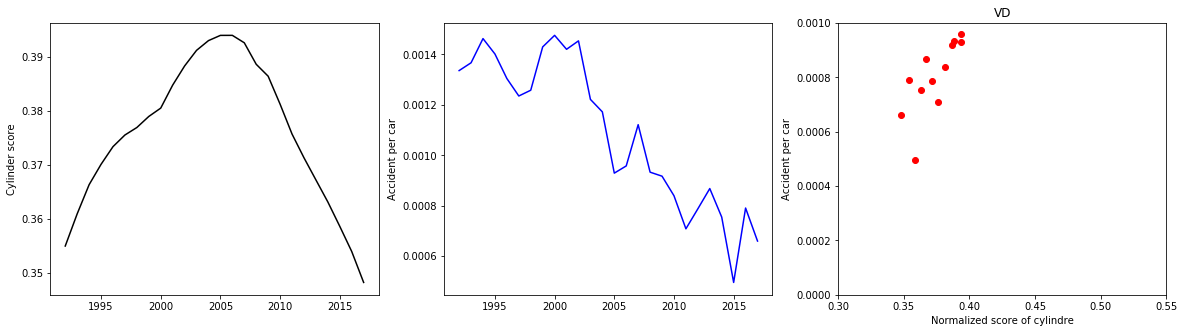

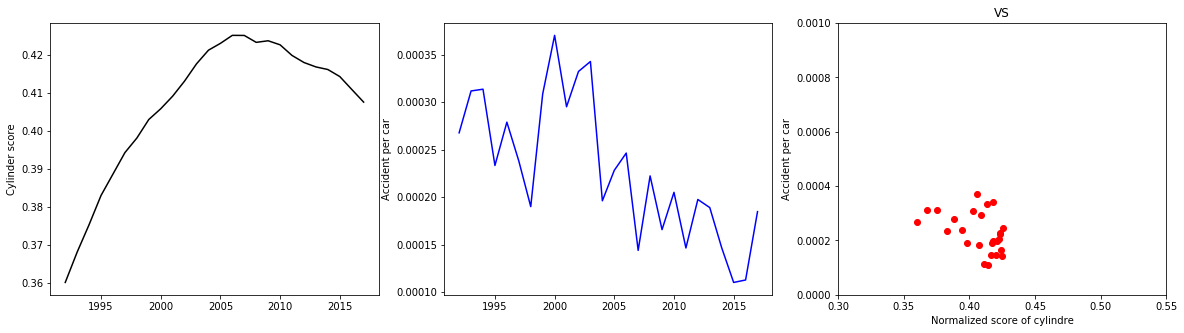

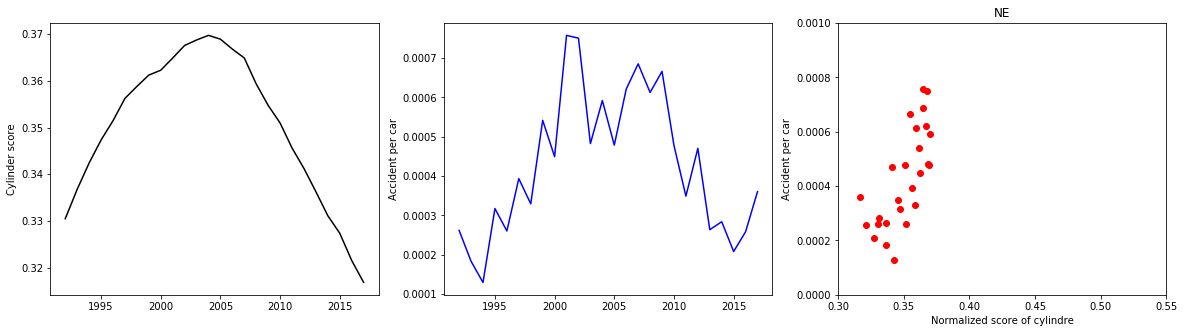

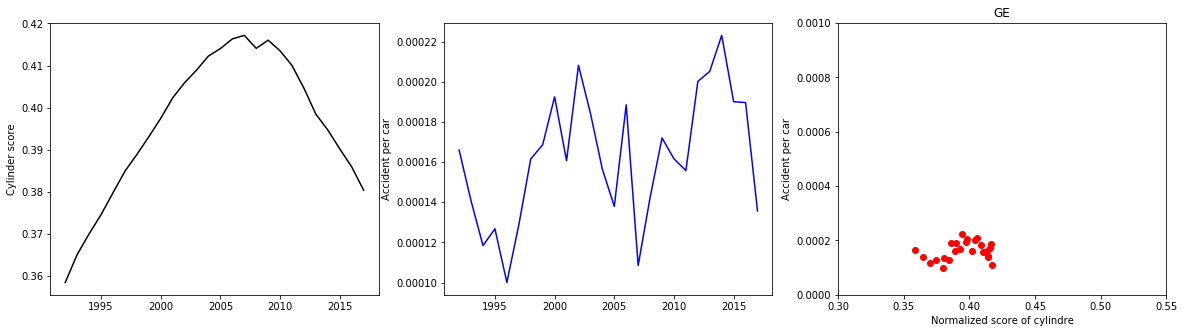

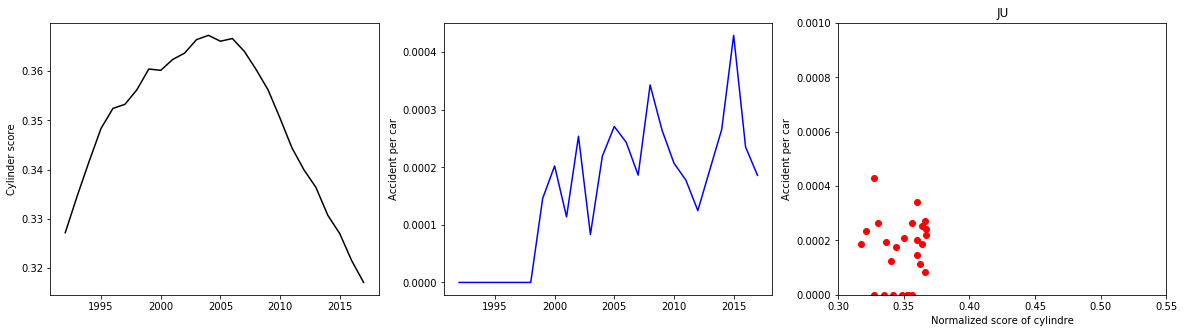

In [30]:
df_accident_cantons = df_Accident_cantons[df_Accident_cantons.ruralite_index==12].groupby(['canton']).sum()


for ctn in df_Voitures['canton'].unique():#df_Voitures['canton'].unique():
    ScoreNorm = []
    AccidentNorm = []
    plt.figure(figsize=(20,5))
    for yr in range(1992,2018):
        df_cyl_canton = df_Voitures[df_Voitures.cylindre_index>0].groupby(['canton','cylindre_index']).sum()
        df_cyl_no_index = df_cyl_canton.reset_index()
        vect_cyl = df_cyl_no_index[df_cyl_no_index.canton==ctn][str(yr)].values
        nVehicle = sum(vect_cyl)
        ScoreNorm.append(cylScore(vect_cyl))
        AccidentNorm.append((df_accident_cantons[str(yr)][ctn])/nVehicle)
    ax1 = plt.subplot(131)
    ax1.plot(range(1992,2018), ScoreNorm, 'k')
    ax1.set_ylabel('Cylinder score')
    ax2 = plt.subplot(132)
    ax2.plot(range(1992,2018), AccidentNorm, 'b')
    ax2.set_ylabel('Accident per car')
    ax3 = plt.subplot(133)
    ax3.scatter(ScoreNorm, AccidentNorm, color='r')
    ax3.axis([0.3, 0.55, 0, 0.001])
    ax3.set_xlabel('Normalized score of cylindre')
    ax3.set_ylabel('Accident per car')
    plt.title(ctn)
    plt.show